The dataset appears to contain information about insurance policyholders and their associated attributes. It likely represents a collection of insurance policies, with each row representing a policyholder and each column representing a specific attribute or feature related to the policy and the policyholder. The dataset may include information such as the duration of the policyholder's relationship with the insurance company, their age, policy number, policy binding date, policy state, coverage limit (CSL), deductible amount, annual premium, umbrella limit, insured ZIP code, and more.

The dataset may also contain information about the policyholder's claims, such as the total claim amount, injury claim amount, property claim amount, and vehicle claim amount. Additionally, it could include information about the policyholder's vehicle, such as the make, model, and year.

The dataset could be used to analyze various aspects of the insurance policies and policyholders, such as exploring patterns in claim amounts based on age, identifying common auto makes and models insured, understanding the distribution of policy states, and investigating potential fraud reports.

Further analysis and exploration of the dataset can provide insights into insurance policy trends, customer demographics, and claims patterns, which can be valuable for insurance companies in managing risks, setting premiums, and improving their services.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/insurance_claims.csv")

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.shape

(1000, 40)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [12]:
df.drop('_c39', axis=1, inplace=True)

In [14]:
police_report_available_column = df['police_report_available']
police_report_available_column

0      YES
1        ?
2       NO
3       NO
4       NO
      ... 
995      ?
996      ?
997    YES
998    YES
999      ?
Name: police_report_available, Length: 1000, dtype: object

In [15]:
df['police_report_available'].replace('?', 'Not available', inplace=True)

In [16]:
police_report_available_column

0                YES
1      Not available
2                 NO
3                 NO
4                 NO
           ...      
995    Not available
996    Not available
997              YES
998              YES
999    Not available
Name: police_report_available, Length: 1000, dtype: object

## **1.What is the distribution of policy states in the dataset?**

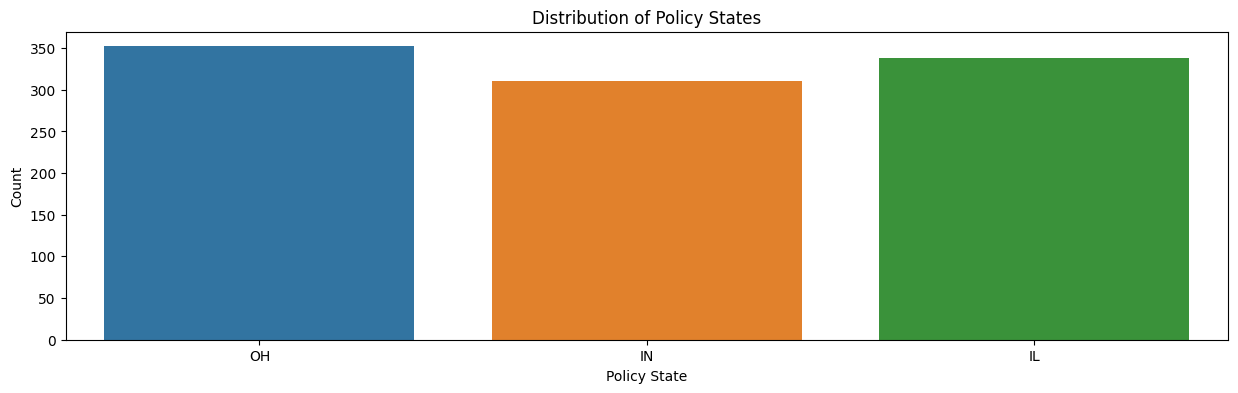

In [22]:
policy_state_counts = df['policy_state'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(15, 4))
sns.countplot(x='policy_state', data=df)
plt.xlabel('Policy State')
plt.ylabel('Count')
plt.title('Distribution of Policy States')
plt.show()

## **2.How does the average policy annual premium vary with age?**

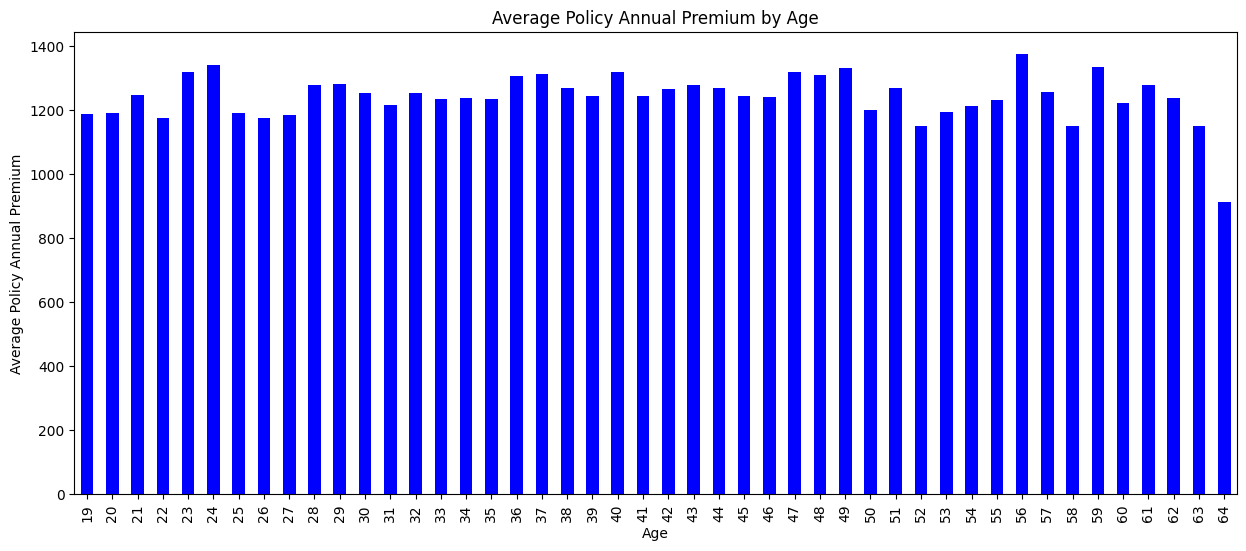

In [24]:
average_premium_by_age = df.groupby('age')['policy_annual_premium'].mean()

# Plotting the bar chart
plt.figure(figsize=(15, 6))
average_premium_by_age.plot(kind='bar', color='blue')
plt.xlabel('Age')
plt.ylabel('Average Policy Annual Premium')
plt.title('Average Policy Annual Premium by Age')
plt.show()

## **3.Which auto makes are most common among the insured policyholders?**

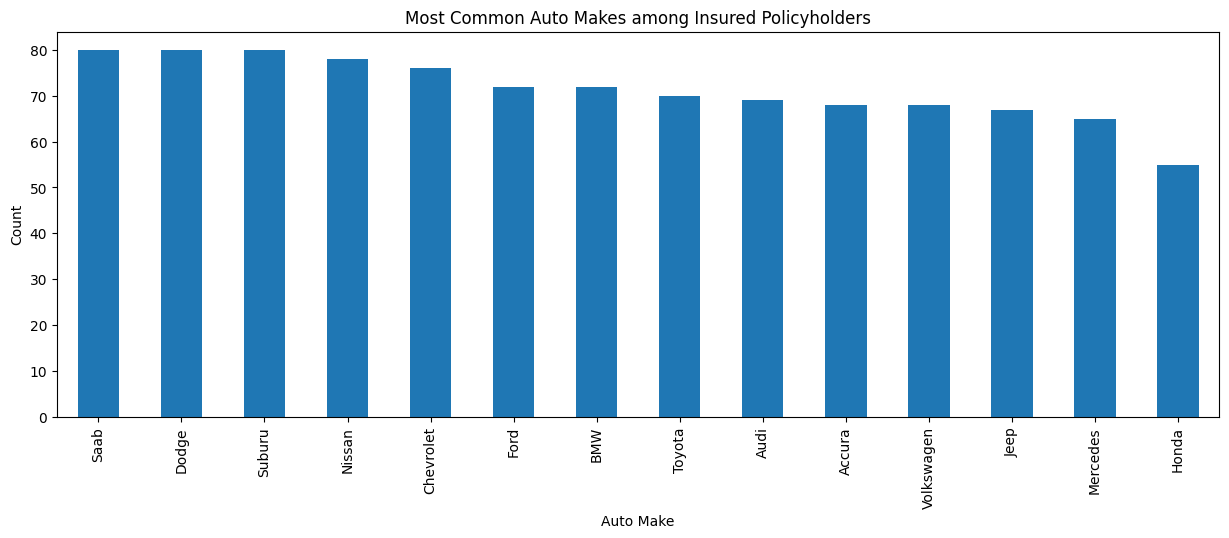

In [26]:
auto_make_counts = df['auto_make'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(15, 5))
auto_make_counts.plot(kind='bar')
plt.title('Most Common Auto Makes among Insured Policyholders')
plt.xlabel('Auto Make')
plt.ylabel('Count')
plt.show()

## **4.What is the distribution of fraud reported versus non-fraud reported policies?**

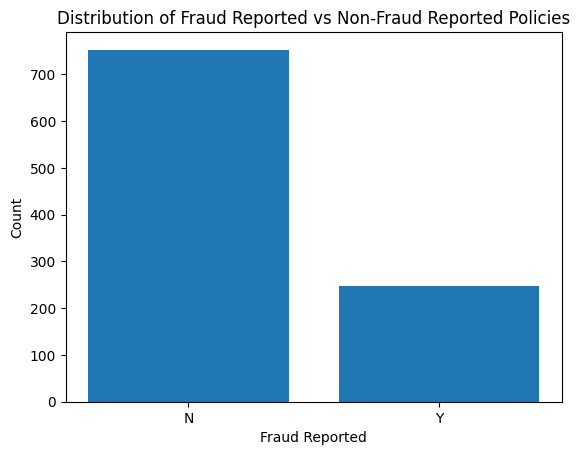

In [27]:
fraud_counts = df['fraud_reported'].value_counts()

# Create a bar chart
plt.bar(fraud_counts.index, fraud_counts.values)

# Set labels and title
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.title('Distribution of Fraud Reported vs Non-Fraud Reported Policies')

# Display the chart
plt.show()

## **5.How does the average total claim amount differ based on the availability of a police report?**

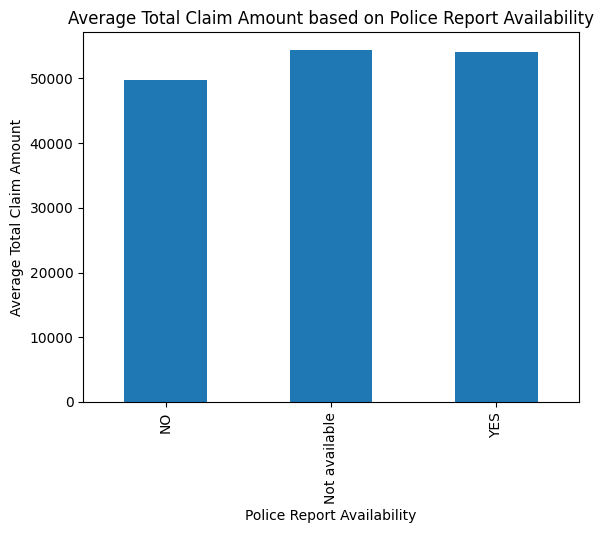

In [28]:
data = df[['police_report_available', 'total_claim_amount']]

# Group the data and calculate the average total claim amount
grouped_data = data.groupby('police_report_available').mean()

# Plot the bar chart
grouped_data.plot(kind='bar', legend=False)
plt.xlabel('Police Report Availability')
plt.ylabel('Average Total Claim Amount')
plt.title('Average Total Claim Amount based on Police Report Availability')
plt.show()

## **6.What is the distribution of policy CSL (combined single limit) values?**

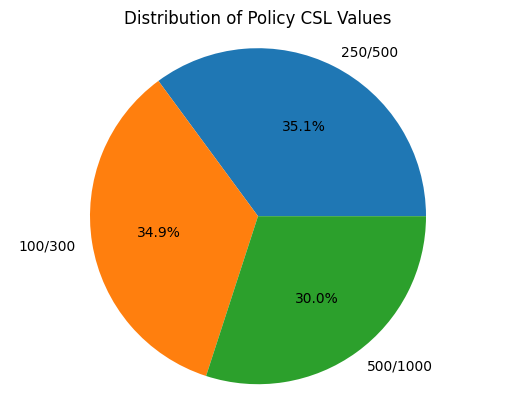

In [30]:
policy_csl_counts = df['policy_csl'].value_counts()

# Extract the CSL labels and their corresponding counts
labels = policy_csl_counts.index
counts = policy_csl_counts.values

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Policy CSL Values")

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

# 8.Which auto models are most commonly insured among the policyholders?

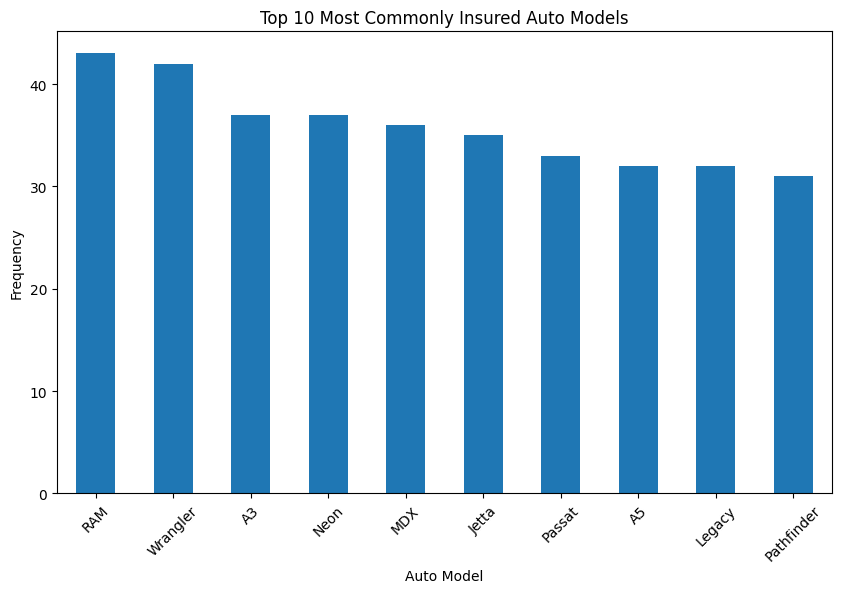

In [32]:
auto_model_counts = df['auto_model'].value_counts().head(10)

plt.figure(figsize=(10, 6))
auto_model_counts.plot(kind='bar')
plt.title('Top 10 Most Commonly Insured Auto Models')
plt.xlabel('Auto Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## **9.What is the distribution of policyholders' ages in the dataset?**

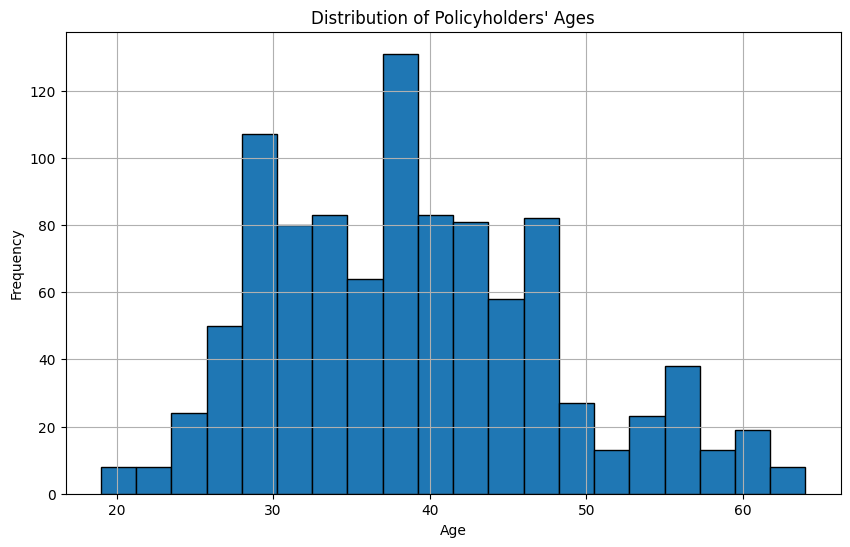

In [36]:
age_data = df['age']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Policyholders\' Ages')
plt.grid(True)
plt.show()